# ANÁLISE EXPLORATÓRIA E SELEÇÃO DE ATRIBUTOS


## Instalação de Pacotes Necessários

In [ ]:
%time
import os
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import statsmodels.api as sm

!pip install --upgrade pandas
import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt
%matplotlib inline

import math as math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

!pip install --upgrade scipy
import scipy as scipy
from scipy import stats
from scipy.stats import t

## Importação de Dados Geolocalizados

In [ ]:
!pip install --upgrade gspread

In [ ]:
# autorização de acesso ao Google Drive  

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
planilha = gc.open('nome_basededados')
pagina = planilha.sheet1
pagina.row_values(1)

In [ ]:
df = pd.DataFrame(pagina.get_all_records())

In [ ]:
df.columns

In [ ]:
df['LnValorTotalAtualizado']=np.log(df['ValorTotalAtualizado'])

In [ ]:
df['LnArea']=np.log(df['AreaProjetadaTratada'])

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df = df.dropna()

In [ ]:
df = df_Uniao.reset_index(drop=True)

In [ ]:
df.dtypes

In [ ]:
df = df.astype({"% Superior Completo": float})
df = df.astype({"% Rede Geral de Distribuicao de Agua": float})
df = df.astype({"% Microcomputador com Acesso a Internet": float})
df = df.astype({"Rendimento Domiciliar Medio": float})

df.dtypes

In [ ]:
df.describe()

In [ ]:
df[df["Fonte"]  == "ME"].count()

In [ ]:
df[df["Fonte"]  == "EB"].count()

In [ ]:
df_Uniao.drop([2730,4341,4581], axis=0, inplace=True)

## Tratamento e Seleção de Atributos

### Classificação dos Municípios pelo IBGE

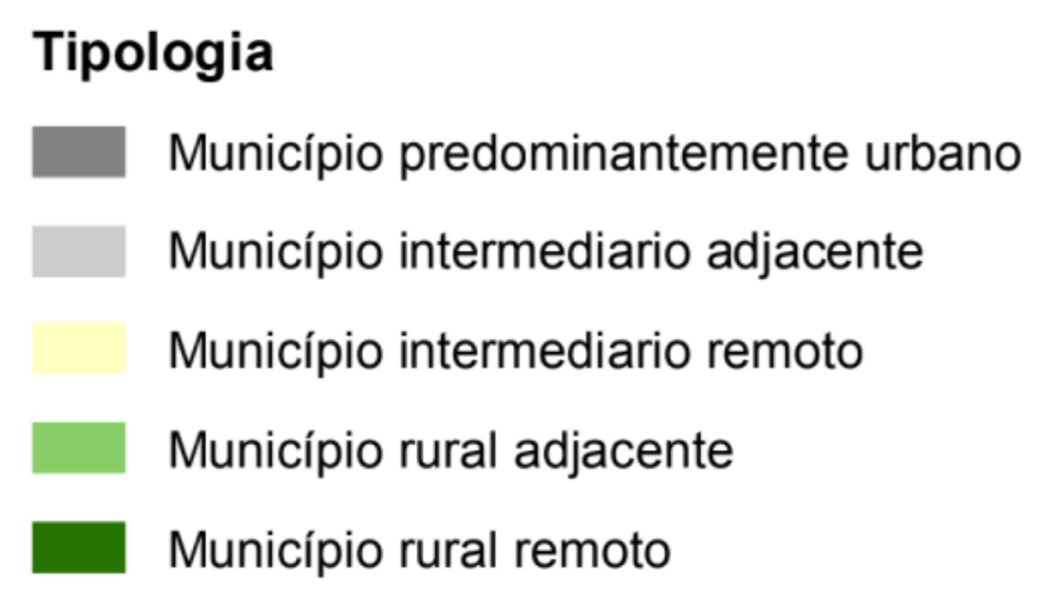

### Construção de Variáveis Tipo Dummy

In [ ]:
df2 = pd.get_dummies(df, columns = ['Vocacao','TipologiaMunicipalIBGE'])

In [ ]:
df2.head()

In [ ]:
df2.dtypes

In [ ]:
df2 = df2.astype({"% Superior Completo": float})
df2 = df2.astype({"% Rede Geral de Distribuicao de Agua": float})
df2 = df2.astype({"% Microcomputador com Acesso a Internet": float})
df2 = df2.astype({"Rendimento Domiciliar Medio": float})

df2.dtypes

In [ ]:
df2.columns

In [ ]:
df2_reduzido = df2.filter(['CapitalUF', 'GrauUrbanizacaoIBGE',
       'IDHM_2010', 'IVS_2010', 'TaxaHomicidios_2019', 'Terreno',
       'CUBJan22', 'IdadeAparenteCategorica', 'VidaUtil',
       'AreaConstruidaTratada', 'AreaProjetadaTratada', 'ValorTotalAtualizado',
       'ValorUnitarioAtualizado', '% Superior Completo',
       '% Rede Geral de Distribuicao de Agua',
       '% Microcomputador com Acesso a Internet',
       'Rendimento Domiciliar Medio',
       'qtd_equipamento', 'qtd_hospital',
       'qtd_parque', 'qtd_delegacia', 'qtd_escola', 'qtd_shopping',
       'qtd_universidade', 'qtd_atracaoturistica', 'qtd_supermercado',
       'qtd_restaurante', 'qtd_padaria', 'qtd_cafeteria', 'qtd_loja',
       'qtd_estabelecimento', 'qtd_parada_onibus', 'qtd_estacao_vlt',
       'qtd_estacao_metro', 'qtd_estacao_trem', 'qtd_aeroporto',
       'acessibilidade', 'GoogleTrends2022', 'Vocacao_Comercial',
       'Vocacao_Institucional', 'Vocacao_Misto', 'Vocacao_Residencial',
       'TipologiaMunicipalIBGE_IntermediarioAdjacente',
       'TipologiaMunicipalIBGE_IntermediarioRemoto',
       'TipologiaMunicipalIBGE_RuralAdjacente',
       'TipologiaMunicipalIBGE_RuralRemoto', 'TipologiaMunicipalIBGE_Urbano'], axis=1)

In [ ]:
df2_reduzido['CUB*AreaConstruida'] = df_Uniao['CUBJan22'] * df_Uniao['AreaConstruidaTratada']

logArea = np.log(df_Uniao['AreaProjetadaTratada'])

df2_reduzido['LnAreaProjetadaTratada'] = logArea

### _Forward-Backward Stepwise Regression_

In [ ]:
df2_reduzido.columns

In [ ]:
X_columns_FSR = ['CapitalUF', 'GrauUrbanizacaoIBGE', 'IDHM_2010', 'IVS_2010',
       'TaxaHomicidios_2019', 'Terreno', 'CUBJan22', 'IdadeAparenteCategorica',
       'VidaUtil', 'AreaConstruidaTratada', 'AreaProjetadaTratada',
       '% Superior Completo', '% Rede Geral de Distribuicao de Agua',
       '% Microcomputador com Acesso a Internet',
       'Rendimento Domiciliar Medio',
       'qtd_equipamento', 'qtd_hospital', 'qtd_parque',
       'qtd_delegacia', 'qtd_escola', 'qtd_shopping', 'qtd_universidade',
       'qtd_atracaoturistica', 'qtd_supermercado', 'qtd_restaurante',
       'qtd_padaria', 'qtd_cafeteria', 'qtd_loja', 'qtd_estabelecimento',
       'qtd_parada_onibus', 'qtd_estacao_vlt', 'qtd_estacao_metro',
       'qtd_estacao_trem', 'qtd_aeroporto', 'acessibilidade',
       'GoogleTrends2022', 'Vocacao_Comercial', 'Vocacao_Institucional',
       'Vocacao_Misto', 'Vocacao_Residencial',
       'TipologiaMunicipalIBGE_IntermediarioAdjacente',
       'TipologiaMunicipalIBGE_IntermediarioRemoto',
       'TipologiaMunicipalIBGE_RuralAdjacente',
       'TipologiaMunicipalIBGE_RuralRemoto', 'TipologiaMunicipalIBGE_Urbano',
       'CUB*AreaConstruida', 'LnAreaProjetadaTratada']

In [ ]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.30, threshold_out = 0.301, verbose=True):
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Adicionar atributo {:30} com p-valor {:.6}'.format(best_feature, best_pval))

            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max()
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Eliminar atributo {:30} com p-valor {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [ ]:
y_FSR = np.log(df2_reduzido['ValorTotalAtualizado'])
y_FSR = y_FSR[:,np.newaxis]

X_FSR = df2_reduzido[X_columns_FSR]

In [ ]:
X_FSR.cov()

In [ ]:
X_FSR.corr()

In [ ]:
result = stepwise_selection(X_FSR, y_FSR)

print('Variáveis Resultantes:')
print(result)

### _Recursive Feature Elimination_ (RFECV)

In [ ]:
estimator = RandomForestRegressor(random_state=0)
selector = RFECV(estimator, step=1, cv=10)
selector = selector.fit(X_FSR, y_FSR.ravel())

selector.ranking_

In [ ]:
print('Número ótimo de atributos explicativos: %d' %selector.n_features_)

Seleção de Atributos com PLS-SEM no _software_ SmartPLS 4

### Seleção Final de Atributos

In [ ]:
df2_reduzido.columns

In [ ]:
X_columns = ['CapitalUF', 'IDHM_2010', 'Terreno', 'IdadeAparenteCategorica',
       'Rendimento Domiciliar Medio', 'qtd_equipamento_semshopping',
       'qtd_shopping', 'qtd_estabelecimento', 'CUB*AreaConstruida', 'Vocacao_Comercial', 'Vocacao_Institucional',
       'Vocacao_Misto', 'Vocacao_Residencial', 'LnAreaProjetadaTratada']

X = df2_reduzido[X_columns]

y = np.log(df2_reduzido['ValorTotalAtualizado'])
y = y_FSR[:,np.newaxis]

In [ ]:
X.describe()

## Análise Gráfica dos Atributos Selecionados

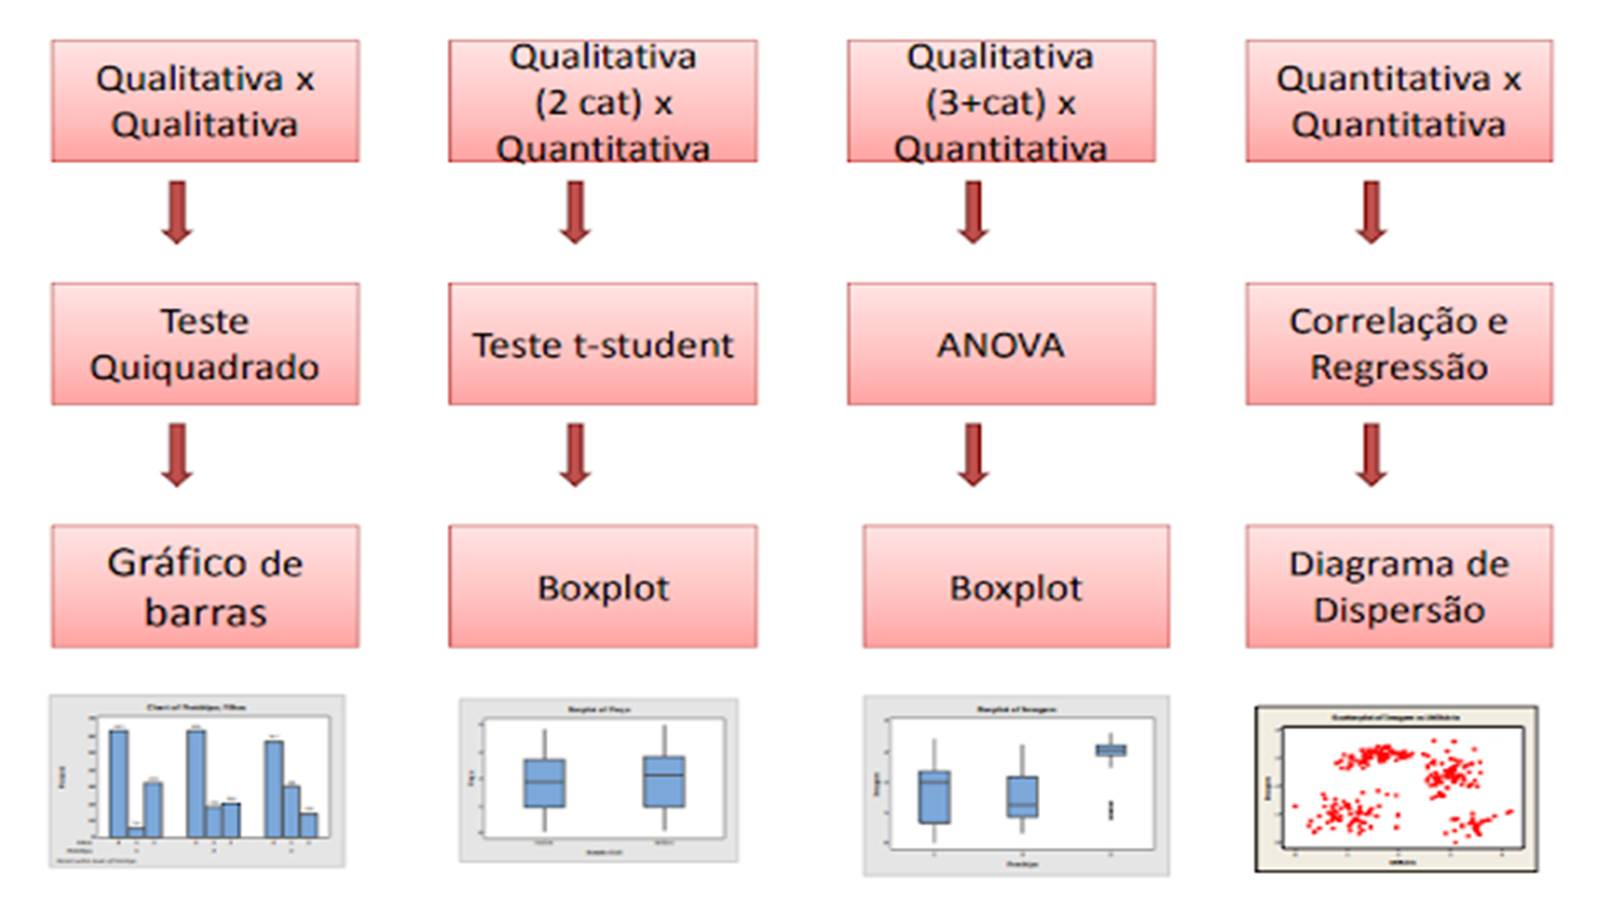

Fonte da Figura: notas de aula da Profa Dra Dalva Regina Ribeiro Barbosa da disciplina de Métodos Quantitativos Aplicados da Fundação Getúlio Vargas (FGV)

In [ ]:
ax = sns.boxplot(data=df_Uniao['ValorTotalAtualizado'], orient="h", palette="Greens")

In [ ]:
ax = sns.boxplot(data=np.log(df_Uniao['ValorTotalAtualizado']), orient="h", palette="Greens")

In [ ]:
ax = sns.boxplot(data=df_Uniao['AreaProjetadaTratada'], orient="h", palette="Blues")

In [ ]:
ax = sns.boxplot(data=np.log(df_Uniao['AreaProjetadaTratada']), orient="h", palette="Blues")

In [ ]:
df_Uniao.columns

In [ ]:
df_Graficos = df_Uniao.copy()

df_Graficos['LnAreaProjetadaTratada'] = np.log(df_Uniao['AreaProjetadaTratada'])
df_Graficos['CUB*AreaConstruida'] = df_Uniao['CUBJan22'] * df_Uniao['AreaConstruidaTratada']
df_Graficos['LnValorTotalAtualizado'] = np.log(df_Uniao['ValorTotalAtualizado'])

X_quant = ['IDHM_2010', 'CUB*AreaConstruida', 'LnAreaProjetadaTratada',
       'Rendimento Domiciliar Medio', 'qtd_equipamento',
       'qtd_shopping', 'qtd_estabelecimento', 'Terreno', 'LnValorTotalAtualizado']

X_varquant = df_Graficos[X_quant]

g = sns.PairGrid(X_varquant, hue="Terreno")
g.map(sns.scatterplot)

## Análise de Correlações de Pearson

In [ ]:
col_list = df_Uniao.columns.tolist()

listaaremover = ['Fonte', 'Id', 'Município', 'UF', 'TipologiaMunicipalIBGE',
       'GrauUrbanizacaoIBGE', 'IVS_2010', 'TaxaHomicidios2019',
       'CodigoAP', 'TipoImovel', 'CUBJan22', 'VidaUtil', 'AreaConstruidaTratada', 'ValorTotalTratado', 'ValorUnitarioTratado',
       'DataAvaliacao', 'IndiceFipeZapAvaliacao', 'IndiceFipeZapJan22',
       'ValorTotalAtualizado', 'ValorUnitarioAtualizado', 'NomeAP', 'AP',
       '% Superior Completo', '% Rede Geral de Distribuicao de Agua',
       '% Microcomputador com Acesso a Internet', 'Codigo', 'xcoord', 'ycoord', 'LatLong', 'qtd_hospital', 'qtd_parque', 'qtd_delegacia',
       'qtd_escola', 'qtd_universidade',
       'qtd_atracaoturistica', 'qtd_supermercado', 'qtd_restaurante',
       'acessibilidade', 'acessibilidade_metro']

for e in listaaremover:
  col_list.remove(e)

df_correlacao = df_Uniao[col_list]

In [ ]:
df_correlacao = pd.get_dummies(df_correlacao, columns = ['Vocacao'])

In [ ]:
df_correlacao.corr()

In [ ]:
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(df_correlacao.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de Calor de Correlações', fontdict={'fontsize':18}, pad=12)

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_correlacao.corr()[['ValorTotalAtualizado']].sort_values(by='ValorTotalAtualizado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dos Atributos com o Valor Total Atualizado', fontdict={'fontsize':18}, pad=16);